In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("churn.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 14)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.rename(columns = {'Exited': 'Churn'})

In [16]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

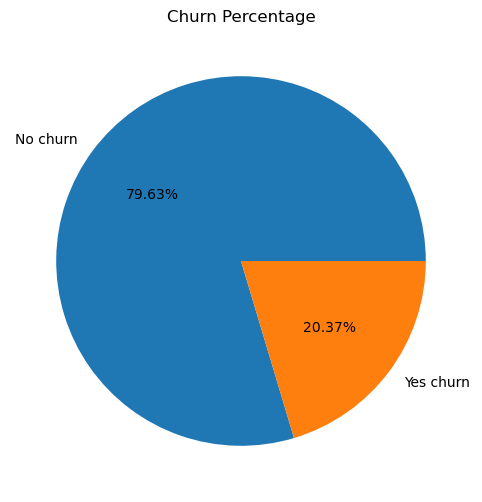

In [18]:
# make a pie chart for churn percentage
plt.figure(figsize = (10, 6)) #set up space to make graph
plt.pie(df['Churn'].value_counts(), labels = ['No churn', 'Yes churn'], autopct = '%1.2f%%') #set up pie chart for churn percentage
plt.title("Churn Percentage") # graph title
plt.show() #display graph


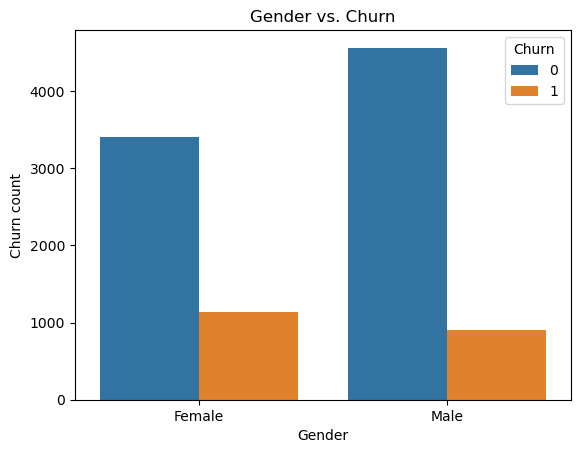

In [19]:
# view relation between gender and customer churn
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Churn count')
plt.show()


Text(0.5, 1.0, 'Age vs. Churn')

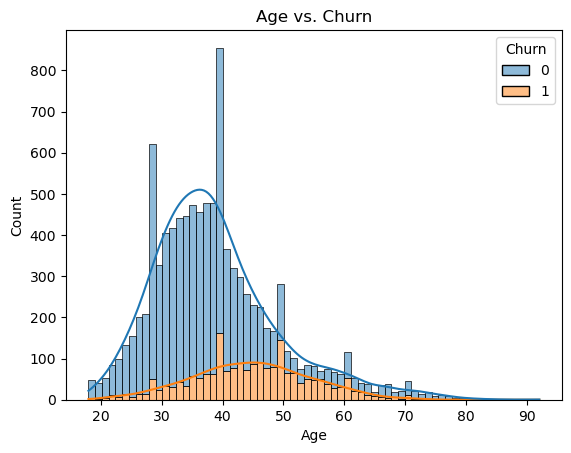

In [20]:
# view age distribution
sns.histplot(data = df, x = 'Age', hue = 'Churn', multiple = 'stack', kde = True)
plt.title('Age vs. Churn')

<Axes: xlabel='Churn', ylabel='CreditScore'>

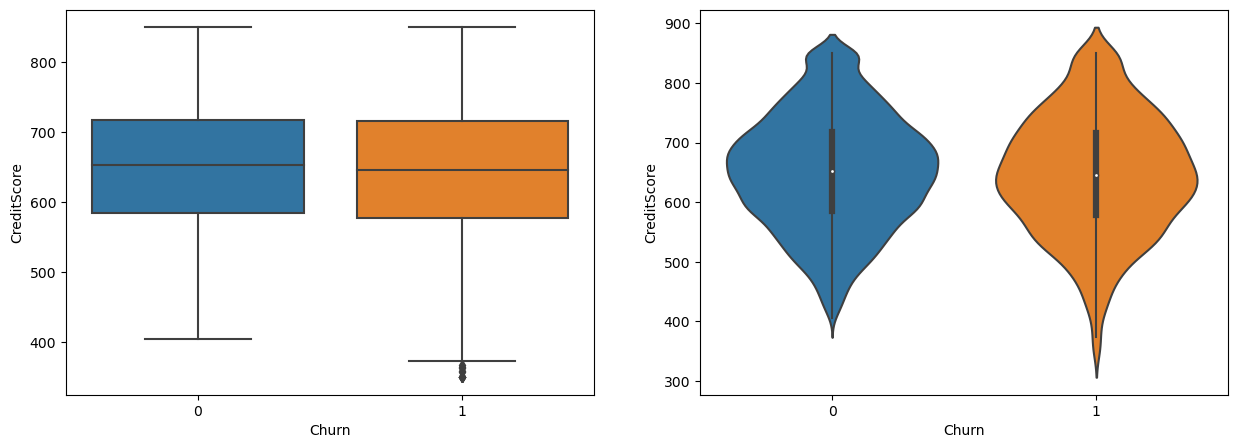

In [21]:
# make plots for credit score
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = 'Churn', y = 'CreditScore', data = df, ax = ax[0])
sns.violinplot(x = 'Churn', y = 'CreditScore', data = df, ax = ax[1])

Text(0, 0.5, 'Churn count')

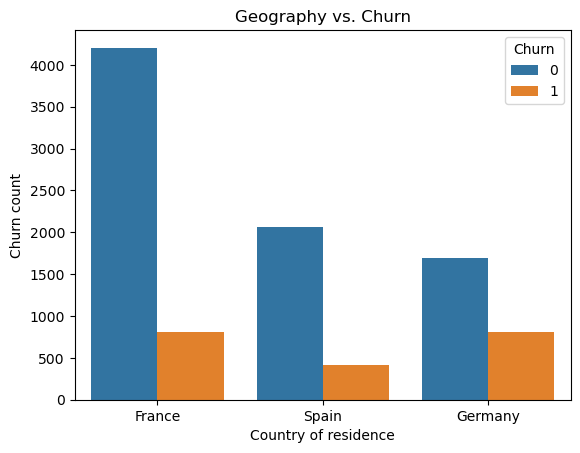

In [22]:
# make a graph for customer location
sns.countplot(x = 'Geography', hue = 'Churn', data = df)
plt.title('Geography vs. Churn')
plt.xlabel('Country of residence')
plt.ylabel('Churn count')

<Axes: xlabel='Tenure', ylabel='count'>

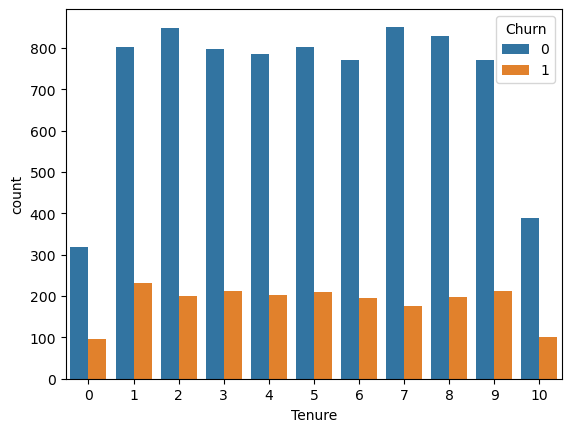

In [23]:
sns.countplot(x = 'Tenure', hue = 'Churn', data = df)

<Axes: xlabel='Balance', ylabel='Count'>

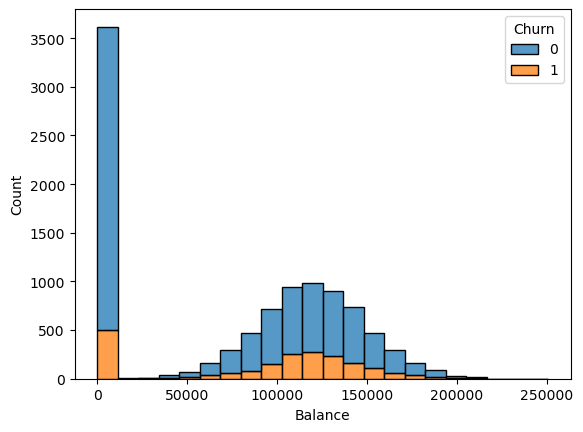

In [24]:
sns.histplot(data = df, x = 'Balance', hue = 'Churn', multiple = 'stack')

In [25]:
df[df['Balance'] == 0]
# all these people have salaries but don't have any money in their bank account-- 0s are null

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [26]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

<Axes: xlabel='NumOfProducts', ylabel='count'>

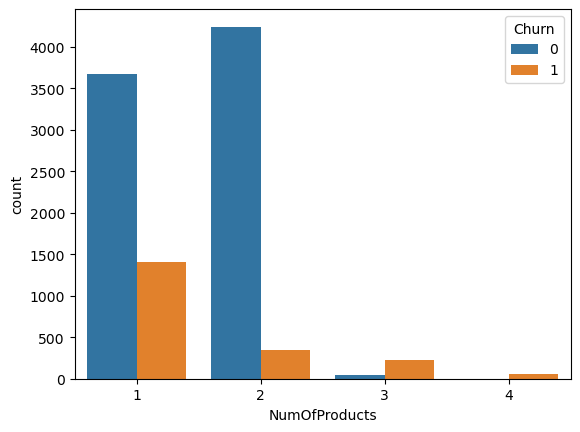

In [27]:
sns.countplot(x = 'NumOfProducts', hue = 'Churn', data = df)

In [28]:
df = df.rename(columns = {'NumOfProducts': 'NumAccounts'})

In [29]:
df['HasCrCard'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='HasCrCard', ylabel='count'>

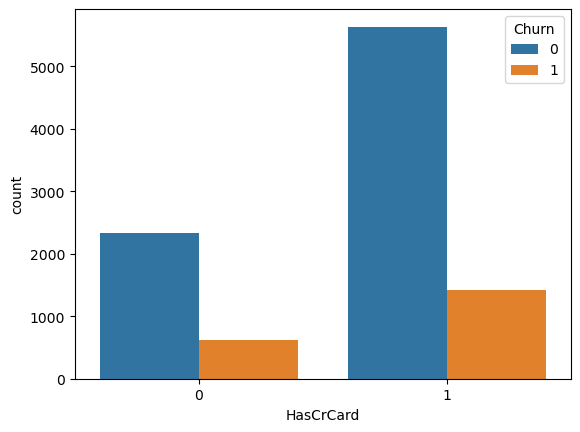

In [30]:
sns.countplot(x = 'HasCrCard', hue = 'Churn', data = df)

<Axes: xlabel='IsActiveMember', ylabel='count'>

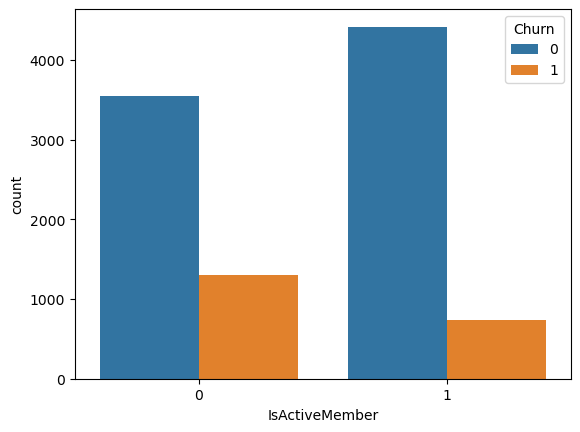

In [31]:
sns.countplot(x = 'IsActiveMember', hue = 'Churn', data = df)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

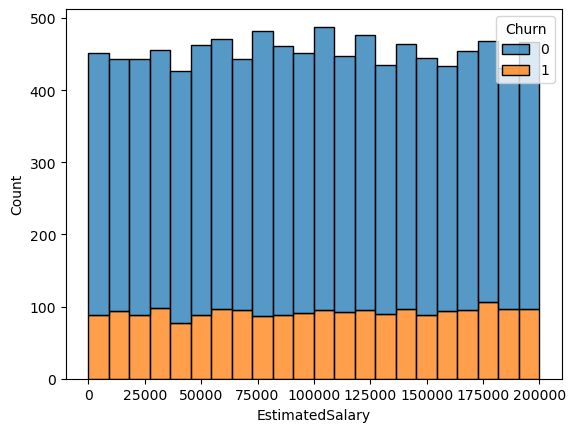

In [32]:
sns.histplot(data = df, x = 'EstimatedSalary', hue = 'Churn', multiple = 'stack')

# Data Preprocessing

In [33]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumAccounts          int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [34]:
cat_vars = ['Geography', 'Gender']

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()

In [37]:
for var in cat_vars:
    encoder.fit(df[var].unique())
    df[var] = encoder.transform(df[var])

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumAccounts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df['Geography'].unique()

array([0, 2, 1])

In [40]:
df['Gender'].unique()

array([0, 1])

Normalization/Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaled_vars = ['CreditScore', 'Balance', 'EstimatedSalary']

In [44]:
df[scaled_vars] = scaler.fit_transform(df[scaled_vars])

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumAccounts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


In [46]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumAccounts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumAccounts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

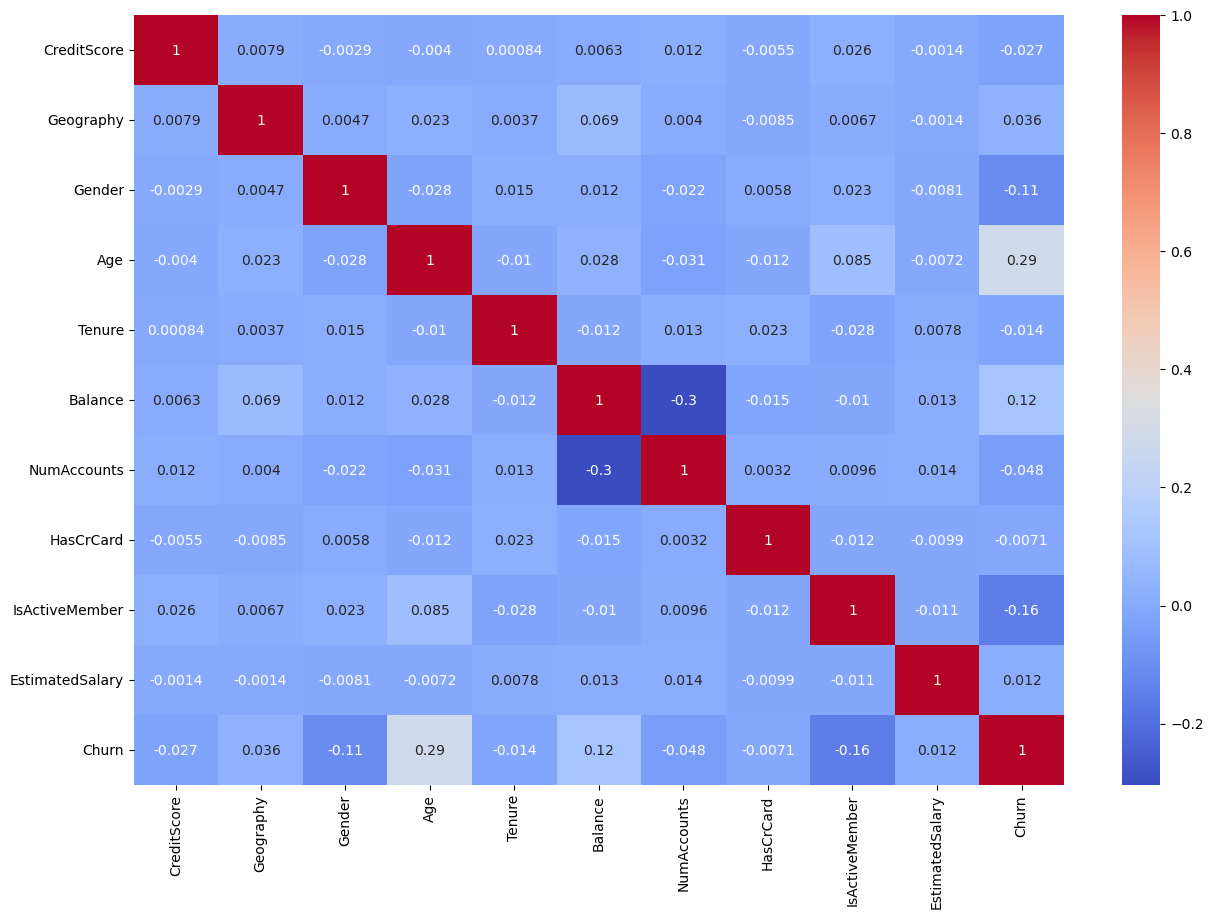

In [47]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')


In [48]:
df.dtypes

CreditScore        float64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumAccounts          int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [49]:
features = df.drop('Churn', axis = 1)

In [50]:
target = df['Churn']

In [51]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 20)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
dtree.score(X_train, y_train)


1.0

In [60]:
dtree.score(X_test, y_test)

0.7836

Decision Tree Classifier with GridSearchCV

In [61]:
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
dtree_gs = DecisionTreeClassifier()
gridsearch = GridSearchCV(dtree_gs, param_grid=param_grid, cv = 5, scoring='roc_auc', verbose=1)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [0, 42]},
             scoring='roc_auc', verbose=1)

In [64]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'random_state': 0}

In [65]:
dtree_gs = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5, random_state=0)
dtree_gs

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=0)

In [66]:
dtree_gs.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=0)

In [67]:
dtree_gs.score(X_train, y_train)

0.8589333333333333

In [68]:
dtree_gs.score(X_test, y_test)

0.8628

In [69]:
dtree_pred = dtree_gs.predict(X_test)

Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Create empty random forest classifier
rfc = RandomForestClassifier()

In [73]:
gridsearch_rfc = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)
gridsearch_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [0, 42]},
             scoring='roc_auc', verbose=1)

In [74]:
gridsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'random_state': 42}

In [75]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5, random_state=42)

In [76]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

In [77]:
rfc.score(X_train, y_train)

0.8856

In [78]:
rfc.score(X_test, y_test)

0.866

In [79]:
rfc_pred = rfc.predict(X_test)